In [4]:
import numpy as np
import matplotlib.pyplot as plt

import mne

import glob
import os

### Set up 

In [5]:
#-----------------------------
#           PARAMETERS
#-----------------------------
evoked_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_ERP_data'
epochs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data'

#period = 'post'
#subjects_to_process = ['05', '06', '07', '08']
subjects_to_process = [ '11']




#### TO DO: take equal subsets from each participant?

In [6]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

evoked_list_pre = []
epochs_list_pre = []
evoked_list_post = []
epochs_list_post = []

#for file in sorted(os.listdir(evoked_dir)):

for subject in subjects_to_process:
    print('Processing subject: ', subject)
    """    file_evokeds = glob.glob(os.path.join(evoked_dir, f'listen_ERP_{period}_{subject}.fif'))[0]
    file_epochs = glob.glob(os.path.join(epochs_dir, f'listen_epochs_{period}_{subject}.fif'))[0]
    print('Processing subject: ', subject)
    evoked = mne.read_evokeds(file_evokeds)[0]
    evoked_list.append(evoked)
    epochs = mne.read_epochs(file_epochs)
    epochs_list.append(epochs)"""

    file_evokeds_pre = glob.glob(os.path.join(evoked_dir, f'listen_ERP_pre_{subject}.fif'))[0]
    file_epochs_pre = glob.glob(os.path.join(epochs_dir, f'listen_epochs_pre_{subject}.fif'))[0]
  
    evoked_pre = mne.read_evokeds(file_evokeds_pre)[0]
    evoked_list_pre.append(evoked_pre)
    epochs_pre = mne.read_epochs(file_epochs_pre)
    epochs_list_pre.append(epochs_pre)

    file_evokeds_post = glob.glob(os.path.join(evoked_dir, f'listen_ERP_post_{subject}.fif'))[0]
    file_epochs_post = glob.glob(os.path.join(epochs_dir, f'listen_epochs_post_{subject}.fif'))[0]
  
    evoked_post = mne.read_evokeds(file_evokeds_post)[0]
    evoked_list_post.append(evoked_post)
    epochs_post = mne.read_epochs(file_epochs_post)
    epochs_list_post.append(epochs_post)


concat_epochs_pre = mne.concatenate_epochs(epochs_list_pre)
concat_evoked_pre = mne.combine_evoked(evoked_list_pre, weights = 'equal')

concat_epochs_post = mne.concatenate_epochs(epochs_list_post)
concat_evoked_post = mne.combine_evoked(evoked_list_post, weights = 'equal')



Processing subject:  11


IndexError: list index out of range

### Plot grand average

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


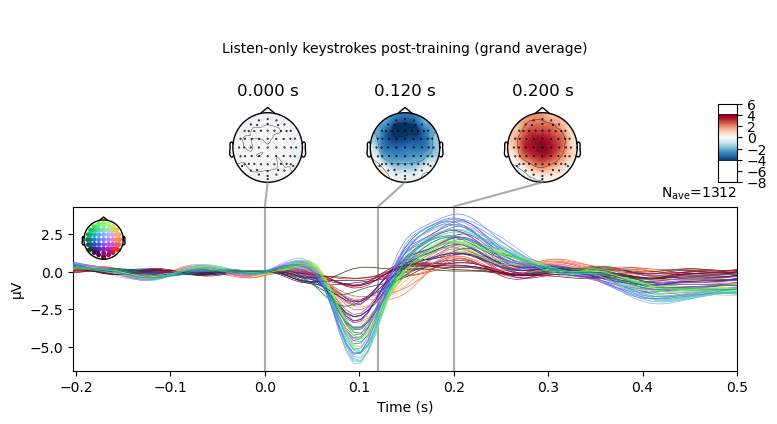

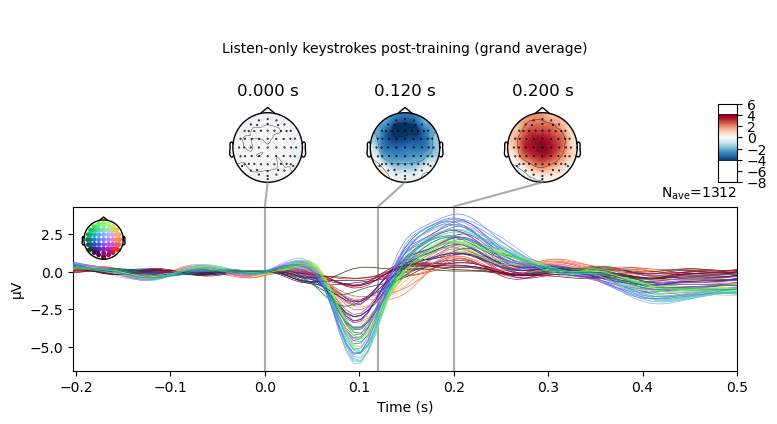

In [ ]:
concat_evoked_pre.plot_joint(times =[ 0, 0.12, 0.2], title= f'Listen-only keystrokes {period}-training (grand average)')

combining channels using "mean"
combining channels using "mean"


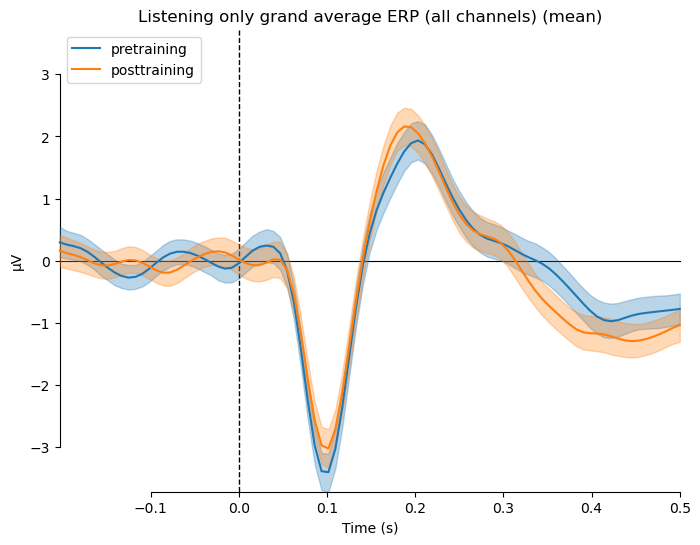

[<Figure size 800x600 with 1 Axes>]

In [ ]:
ga = dict(
        pretraining=list(concat_epochs_pre.iter_evoked()),
        posttraining=list(concat_epochs_post.iter_evoked()))
mne.viz.plot_compare_evokeds(ga, title = 'Listening only grand average ERP (all channels)',combine = 'mean')